# Visualise COVID-19 Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data.populations import get_pop_lookup

In [2]:
rel_path = 'data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
conf_fn = rel_path + 'time_series_covid19_confirmed_global.csv'
death_fn = rel_path + 'time_series_covid19_deaths_global.csv'
recov_fn = rel_path + 'time_series_covid19_recovered_global.csv'

In [29]:
def reformat_chart(df, gb_country=False):
    '''remove uneeded columns and transpose for easy plotting'''
    df = df.copy()
    del df['Lat']
    del df['Long']
    del df['Province/State']
    if gb_country:
        df = df.groupby('Country/Region').sum().reset_index()
    df.index = df['Country/Region'].values
    del df['Country/Region']
    return df.T

cummulative_deaths = pd.read_csv(death_fn)
cummulative_deaths = reformat_chart(cummulative_deaths, gb_country=True)

In [30]:
cummulative_cases = pd.read_csv(conf_fn)
cummulative_cases = reformat_chart(cummulative_cases, gb_country=True)

In [31]:
def make_new_cases_df(df):
    '''Take cummulative numbers and covert to daily increment'''
    dfnd = df.iloc[1:].values - df.iloc[:-1].values
    dfnd = pd.DataFrame(dfnd)
    dfnd.index = df.index[1:]
    dfnd.columns = df.columns
    return dfnd

daily_deaths = make_new_cases_df(cummulative_deaths)
daily_cases = make_new_cases_df(cummulative_cases)

In [32]:
def make_pop_normal(df, per_x=1000000):
    '''Normalise cummulative deaths by population
    per_x is deaths per x people in population - default: 1 million'''
    pop_lookup = get_pop_lookup.get_pop_dict('data/populations/populations.csv', death_fn)
    dfn = df.copy()
    for country, pop in pop_lookup.items():
        dfn[country] = dfn[country] * per_x / pop
    return dfn[list(pop_lookup.keys())]

deaths_per_mill = make_pop_normal(cummulative_deaths)
cases_per_mill = make_pop_normal(cummulative_cases)

In [33]:
max_deaths = pd.Series(deaths_per_mill.iloc[-1, :], index=deaths_per_mill.columns)
top_10 = max_deaths.sort_values(ascending=False)[1:11].index

max_cases = pd.Series(cases_per_mill.iloc[-1, :], index=cases_per_mill.columns)
top_10c = max_cases.sort_values(ascending=False)[1:11].index

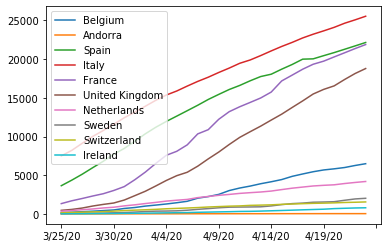

In [34]:
cummulative_deaths[top_10][-30:].plot(logy=False);

In [49]:
cummulative_cases.columns == cummulative_deaths.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [51]:
cases_per_death = cummulative_cases.iloc[-1, :] / cummulative_deaths.iloc[-1, :]

In [65]:
cases_per_death = cases_per_death.sort_values()

inf

In [42]:
cummulative_cases['Germany'][-1] / cummulative_deaths['Germany'][-1]

27.467085201793722

In [43]:
cummulative_cases['New Zealand'][-1] / cummulative_deaths['New Zealand'][-1]

85.6470588235294

In [45]:
cummulative_cases['US'][-1] / cummulative_deaths['US'][-1]

17.39940745485847

In [46]:
cummulative_cases['France'][-1] / cummulative_deaths['France'][-1]

7.232080040202842

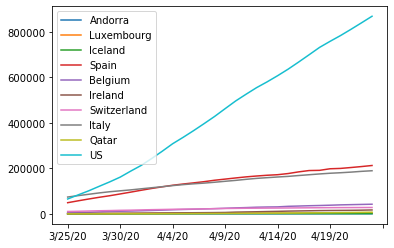

In [67]:
cummulative_cases[top_10c][-30:].plot(logy=False);

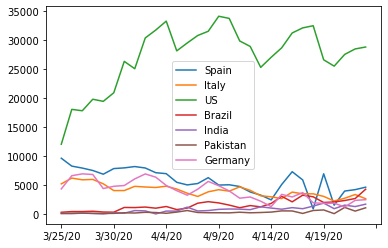

In [37]:
daily_cases[['Spain', 'Italy', 'US', 'Brazil', 'India', 'Pakistan', 'Germany']][-30:].plot();

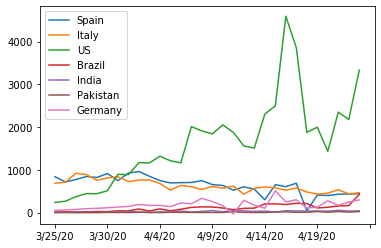

In [38]:
daily_deaths[['Spain', 'Italy', 'US', 'Brazil', 'India', 'Pakistan', 'Germany']][-30:].plot();

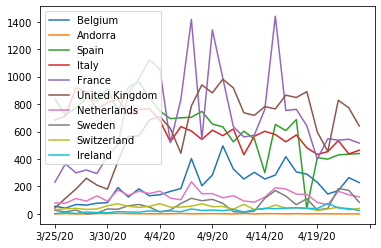

In [39]:
daily_deaths[top_10][-30:].plot();

In [10]:
daily_deaths.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=185)

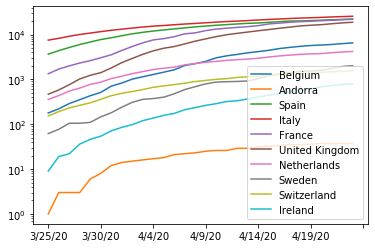

In [16]:
cummulative_deaths[top_10][-30:].plot(logy=True);

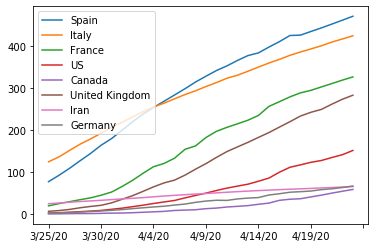

In [12]:
deaths_per_mill[['Spain', 'Italy', 'France', 'US', 'Canada', 'United Kingdom', 'Iran', 'Germany']][-30:].plot(logy=False);

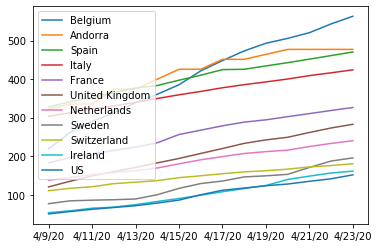

In [21]:
deaths_per_mill[(list(top_10) + ['US'])][-15:].plot()